In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [2]:
df1=pd.read_csv('train.csv', encoding='utf-8')
df2=pd.read_csv('test.csv', encoding='utf-8')
df2_org=df2
df1.drop(['PassengerId', 'Name', 'Age', 'SibSp'], axis=1, inplace=True)
df2.drop(['Name', 'Age', 'SibSp'], axis=1, inplace=True)


In [3]:
df1

,Survived,Pclass,Sex,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,0,A/5 21171,7.2500,NaN,S
1,1,1,female,0,PC 17599,71.2833,C85,C
2,1,3,female,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,female,0,113803,53.1000,C123,S
4,0,3,male,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...
886,0,2,male,0,211536,13.0000,NaN,S
887,1,1,female,0,112053,30.0000,B42,S
888,0,3,female,2,W./C. 6607,23.4500,NaN,S
889,1,1,male,0,111369,30.0000,C148,C


In [4]:
from sklearn.preprocessing import LabelEncoder

# Apply LabelEncoder to all categorical columns
label_encoders = {}  # To store the encoders for each column
for col in df1.select_dtypes(include=['object', 'category']).columns:
    le = LabelEncoder()
    df1[col] = le.fit_transform(df1[col])
    df2[col] = le.fit_transform(df2[col])
    label_encoders[col] = le  # Save the encoder for inverse transform if needed


In [5]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=3)  # n_neighbors defines the number of neighbors to use
df1_imputed = pd.DataFrame(imputer.fit_transform(df1), columns=df1.columns)
df1=df1_imputed
df2_imputed = pd.DataFrame(imputer.fit_transform(df2), columns=df2.columns)
df2=df2_imputed

In [6]:
df1_imputed

,Survived,Pclass,Sex,Parch,Ticket,Fare,Cabin,Embarked
0,0.0,3.0,1.0,0.0,523.0,7.2500,147.0,2.0
1,1.0,1.0,0.0,0.0,596.0,71.2833,81.0,0.0
2,1.0,3.0,0.0,0.0,669.0,7.9250,147.0,2.0
3,1.0,1.0,0.0,0.0,49.0,53.1000,55.0,2.0
4,0.0,3.0,1.0,0.0,472.0,8.0500,147.0,2.0
...,...,...,...,...,...,...,...,...
886,0.0,2.0,1.0,0.0,101.0,13.0000,147.0,2.0
887,1.0,1.0,0.0,0.0,14.0,30.0000,30.0,2.0
888,0.0,3.0,0.0,2.0,675.0,23.4500,147.0,2.0
889,1.0,1.0,1.0,0.0,8.0,30.0000,60.0,0.0


In [7]:
df2

,PassengerId,Pclass,Sex,Parch,Ticket,Fare,Cabin,Embarked
0,892.0,3.0,1.0,0.0,152.0,7.8292,76.0,1.0
1,893.0,3.0,0.0,0.0,221.0,7.0000,76.0,2.0
2,894.0,2.0,1.0,0.0,73.0,9.6875,76.0,1.0
3,895.0,3.0,1.0,0.0,147.0,8.6625,76.0,2.0
4,896.0,3.0,0.0,1.0,138.0,12.2875,76.0,2.0
...,...,...,...,...,...,...,...,...
413,1305.0,3.0,1.0,0.0,267.0,8.0500,76.0,2.0
414,1306.0,1.0,0.0,0.0,324.0,108.9000,22.0,0.0
415,1307.0,3.0,1.0,0.0,346.0,7.2500,76.0,2.0
416,1308.0,3.0,1.0,0.0,220.0,8.0500,76.0,2.0


In [8]:
#Correlation between numerical features and target
numeric_features=df1.select_dtypes(include=['int64','float64'])
correlation_matrix = numeric_features.corr()
correlation_with_target = correlation_matrix['Survived'].sort_values(ascending=False)
print(correlation_with_target)

Survived    1.000000
Fare        0.257307
Parch       0.081629
Embarked   -0.163517
Ticket     -0.164549
Cabin      -0.254888
Pclass     -0.338481
Sex        -0.543351
Name: Survived, dtype: float64


Text(0, 0.5, 'Correlation')

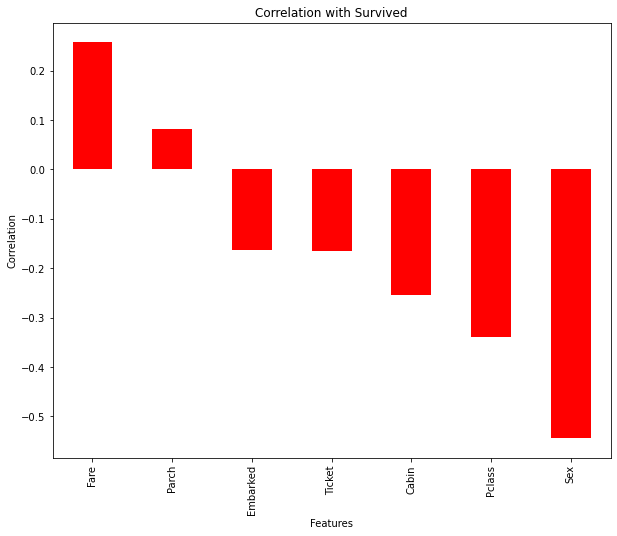

In [9]:
import matplotlib.pyplot as plt
#visualize correlation
plt.figure(figsize=(10,8))
correlation_with_target.drop('Survived').plot(kind='bar', color='red')
plt.title('Correlation with Survived')
plt.xlabel('Features')
plt.ylabel('Correlation')

Epoch 1/20
28/28 [==============================] - 1s 7ms/step - loss: 0.5513 - accuracy: 0.7472 - val_loss: 0.1914 - val_accuracy: 0.8889
Epoch 2/20
28/28 [==============================] - 0s 3ms/step - loss: 0.4772 - accuracy: 0.7925 - val_loss: 0.3777 - val_accuracy: 0.8889
Epoch 3/20
28/28 [==============================] - 0s 2ms/step - loss: 0.4597 - accuracy: 0.7982 - val_loss: 0.3532 - val_accuracy: 0.7778
Epoch 4/20
28/28 [==============================] - 0s 2ms/step - loss: 0.4537 - accuracy: 0.7959 - val_loss: 0.4767 - val_accuracy: 0.6667
Epoch 5/20
28/28 [==============================] - 0s 3ms/step - loss: 0.4507 - accuracy: 0.8061 - val_loss: 0.3930 - val_accuracy: 0.8889
Epoch 6/20
28/28 [==============================] - 0s 2ms/step - loss: 0.4473 - accuracy: 0.8005 - val_loss: 0.2717 - val_accuracy: 0.8889
Epoch 7/20
28/28 [==============================] - 0s 2ms/step - loss: 0.4698 - accuracy: 0.8005 - val_loss: 0.4574 - val_accuracy: 0.5556
Epoch 8/20
28/28 [==

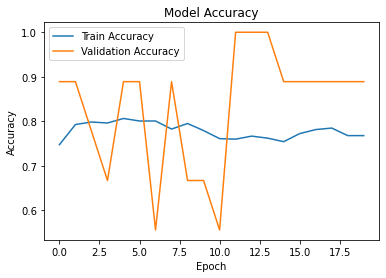

In [12]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Assuming df1 is your DataFrame with 'Survived' as the target column

# Initialize StandardScaler
scaler_X = StandardScaler()

# Separate features and target variable
X = df1.drop('Survived', axis=1)  # Drop the target column from the features
Y = df1['Survived']  # Target variable

# Fit and transform the feature data
X_scaled = scaler_X.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.01, random_state=42)

# Build a simple neural network model
model = Sequential([
    Dense(64, activation='relu', input_dim=X_train.shape[1]),  # Input layer with 64 neurons
    Dense(32, activation='relu'),                             # Hidden layer with 32 neurons
    Dense(1, activation='sigmoid')                            # Output layer (binary classification)
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.1), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, Y_train, epochs=20, batch_size=32, validation_data=(X_test, Y_test), verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print(f"Accuracy: {accuracy:.2f}")

# Generate predictions
y_pred = (model.predict(X_test) > 0.5).astype(int)

# Classification Report
print("\nClassification Report:")
print(classification_report(Y_test, y_pred))

# Plot training history (Optional)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [14]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Assuming df1 is your original training DataFrame and df2 is the new test dataset
# Ensure that df2 is loaded correctly

# Separate features from df1 and df2
X_train = df1.drop('Survived', axis=1)
Y_train = df1['Survived']

# Initialize StandardScaler
scaler_X = StandardScaler()

# Scale the features in the training set
X_train_scaled = scaler_X.fit_transform(X_train)

# Scale the features in the test set (using the scaler from the training data)
X1_test = df2[X_train.columns]  # Ensure same feature columns in both training and test set
X1_test_scaled = scaler_X.transform(X1_test)  # Don't fit, just transform with the already-fitted scaler

# Build the neural network model
model = Sequential([
    Dense(64, activation='relu', input_dim=X_train_scaled.shape[1]),  # Input layer with 64 neurons
    Dense(32, activation='relu'),  # Hidden layer with 32 neurons
    Dense(1, activation='sigmoid')  # Output layer (binary classification)
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.1), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model on the training data
model.fit(X_train_scaled, Y_train, epochs=20, batch_size=32, verbose=1)

# Make predictions on the test set
test_predictions = (model.predict(X1_test_scaled) > 0.5).astype(int)

# Save the predictions to a CSV file, including the 'PassengerId' column
predictions_df = pd.DataFrame({'PassengerId': df2['PassengerId'], 'Survived': test_predictions.flatten()})

# Convert 'PassengerId' to integer type
predictions_df['PassengerId'] = predictions_df['PassengerId'].astype('Int32')

# Save predictions to CSV
predictions_df.to_csv('neural_network_predictions.csv', index=False)

print("Training on the full dataset is complete. Predictions saved!")


Epoch 1/20
28/28 [==============================] - 1s 2ms/step - loss: 0.6271 - accuracy: 0.7351
Epoch 2/20
28/28 [==============================] - 0s 2ms/step - loss: 0.5086 - accuracy: 0.7710
Epoch 3/20
28/28 [==============================] - 0s 1ms/step - loss: 0.4484 - accuracy: 0.8013
Epoch 4/20
28/28 [==============================] - 0s 2ms/step - loss: 0.4481 - accuracy: 0.8070
Epoch 5/20
28/28 [==============================] - 0s 2ms/step - loss: 0.4615 - accuracy: 0.7924
Epoch 6/20
28/28 [==============================] - 0s 2ms/step - loss: 0.4471 - accuracy: 0.8025
Epoch 7/20
28/28 [==============================] - 0s 2ms/step - loss: 0.4476 - accuracy: 0.7912
Epoch 8/20
28/28 [==============================] - 0s 2ms/step - loss: 0.4850 - accuracy: 0.8047
Epoch 9/20
28/28 [==============================] - 0s 2ms/step - loss: 0.5230 - accuracy: 0.7677
Epoch 10/20
28/28 [==============================] - 0s 2ms/step - loss: 0.5381 - accuracy: 0.7250
Epoch 11/20
28/28 [

In [ ]:
predictions_df